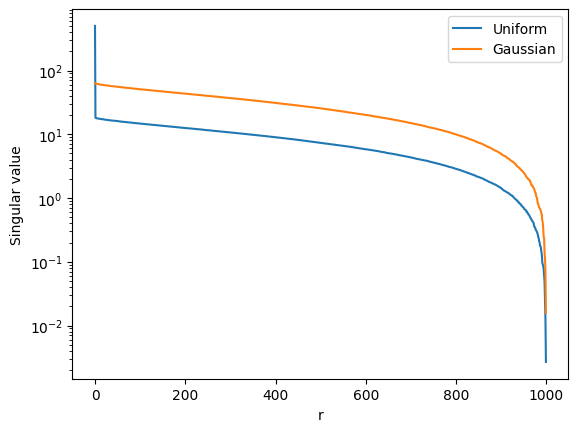

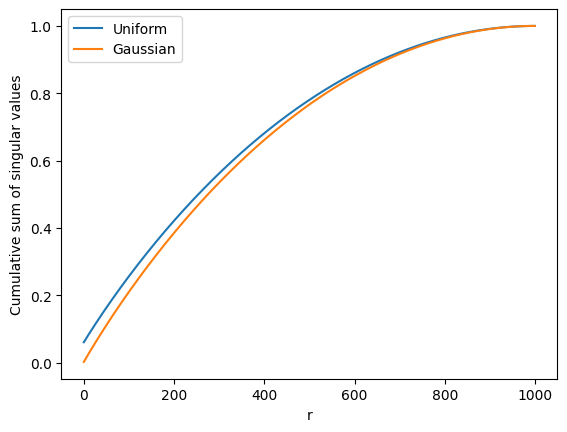

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

uniform_matrix = np.random.rand(1000, 1000)
gaussian_matrix = np.random.randn(1000, 1000)

_, S_uniform, _ = np.linalg.svd(uniform_matrix)
_, S_gaussian, _ = np.linalg.svd(gaussian_matrix)

plt.semilogy(S_uniform, label='Uniform')
plt.semilogy(S_gaussian, label='Gaussian')
plt.ylabel('Singular value')
plt.xlabel('r')
plt.legend()
plt.show()

plt.plot(np.cumsum(S_uniform)/np.sum(S_uniform), label='Uniform')
plt.plot(np.cumsum(S_gaussian)/np.sum(S_gaussian), label='Gaussian')
plt.ylabel('Cumulative sum of singular values')
plt.xlabel('r')
plt.legend()
plt.show()


In [83]:
diff = np.mean(S_gaussian) - np.mean(S_uniform)

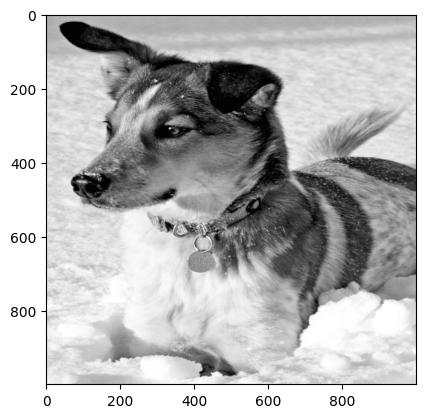

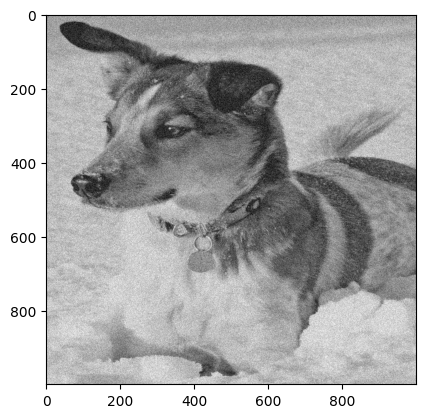

In [91]:
import os
from PIL import Image

original_image = Image.open(os.path.join('..', 'DATA', 'dog.jpg'))
X = np.mean(original_image.resize((1000, 1000)), -1)

gamma = 0.5
tau = (4/np.sqrt(3)) * np.sqrt(1000) * gamma - diff

t = np.linspace(-3,3,1000)

plt.imshow(X, cmap='gray')
plt.show()
X_noisy = X + uniform_matrix * 256 * gamma
plt.imshow(X_noisy, cmap='gray')
plt.show()

989


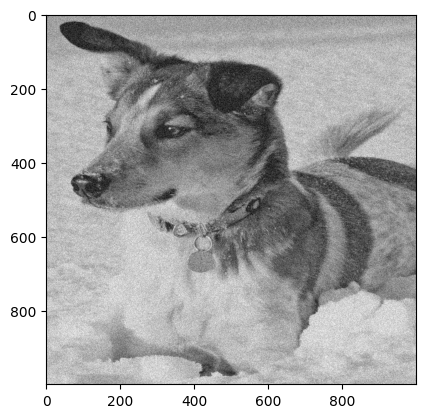

In [92]:
U, S, VT = np.linalg.svd(X_noisy)
threshold = np.max(np.where(S > tau))
print(threshold)
X_reconstructed = U[:, :threshold] @ np.diag(S[:threshold]) @ VT[:threshold, :]
plt.imshow(X_reconstructed, cmap='gray')